## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2020-05-05 02:47:16--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.232.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.232.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  78.7MB/s    in 4.7s    

2020-05-05 02:47:21 (68.6 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_

<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.25)
  (fc1): Linear(in_features=57600, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=136, bias=True)
)


## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250), RandomCrop(224), Normalize(), ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [5]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [6]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [7]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [8]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [9]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

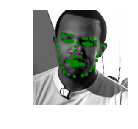

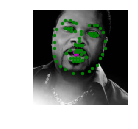

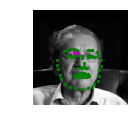

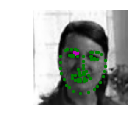

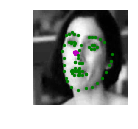

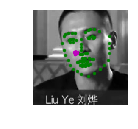

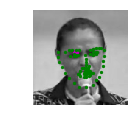

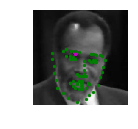

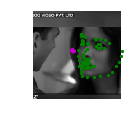

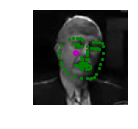

In [12]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [13]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.SmoothL1Loss()

optimizer = optim.Adam(net.parameters(), lr=0.001)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [14]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [15]:
# train your network
n_epochs = 20 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.14604231715202332
Epoch: 1, Batch: 20, Avg. Loss: 0.08975669629871845
Epoch: 1, Batch: 30, Avg. Loss: 0.10173017829656601
Epoch: 1, Batch: 40, Avg. Loss: 0.09472480192780494
Epoch: 1, Batch: 50, Avg. Loss: 0.08649861775338649
Epoch: 1, Batch: 60, Avg. Loss: 0.10559820905327796
Epoch: 1, Batch: 70, Avg. Loss: 0.08584220856428146
Epoch: 1, Batch: 80, Avg. Loss: 0.08095374852418899
Epoch: 1, Batch: 90, Avg. Loss: 0.08925964273512363
Epoch: 1, Batch: 100, Avg. Loss: 0.09370451383292674
Epoch: 1, Batch: 110, Avg. Loss: 0.09775997549295426
Epoch: 1, Batch: 120, Avg. Loss: 0.09444260597229004
Epoch: 1, Batch: 130, Avg. Loss: 0.11257007345557213
Epoch: 1, Batch: 140, Avg. Loss: 0.08812694288790227
Epoch: 1, Batch: 150, Avg. Loss: 0.08646837025880813
Epoch: 1, Batch: 160, Avg. Loss: 0.09050328359007835
Epoch: 1, Batch: 170, Avg. Loss: 0.08396884948015212
Epoch: 1, Batch: 180, Avg. Loss: 0.0869633674621582
Epoch: 1, Batch: 190, Avg. Loss: 0.09379170089960098
Epo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.07051096223294735
Epoch: 2, Batch: 20, Avg. Loss: 0.08466077968478203
Epoch: 2, Batch: 30, Avg. Loss: 0.0705905243754387
Epoch: 2, Batch: 40, Avg. Loss: 0.06667232699692249
Epoch: 2, Batch: 50, Avg. Loss: 0.062125800363719466
Epoch: 2, Batch: 60, Avg. Loss: 0.06868543028831482
Epoch: 2, Batch: 70, Avg. Loss: 0.06404942274093628
Epoch: 2, Batch: 80, Avg. Loss: 0.06963878609240055
Epoch: 2, Batch: 90, Avg. Loss: 0.06582846380770206
Epoch: 2, Batch: 100, Avg. Loss: 0.06839528530836106
Epoch: 2, Batch: 110, Avg. Loss: 0.0843661107122898
Epoch: 2, Batch: 120, Avg. Loss: 0.06557018160820008
Epoch: 2, Batch: 130, Avg. Loss: 0.07325160428881645
Epoch: 2, Batch: 140, Avg. Loss: 0.06696689017117023
Epoch: 2, Batch: 150, Avg. Loss: 0.08186509944498539
Epoch: 2, Batch: 160, Avg. Loss: 0.06081967018544674
Epoch: 2, Batch: 170, Avg. Loss: 0.07729154527187347
Epoch: 2, Batch: 180, Avg. Loss: 0.06978646330535412
Epoch: 2, Batch: 190, Avg. Loss: 0.07318006716668606
Epo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.03731125062331557
Epoch: 3, Batch: 20, Avg. Loss: 0.04013309869915247
Epoch: 3, Batch: 30, Avg. Loss: 0.06421396434307099
Epoch: 3, Batch: 40, Avg. Loss: 0.03149976059794426
Epoch: 3, Batch: 50, Avg. Loss: 0.04513722918927669
Epoch: 3, Batch: 60, Avg. Loss: 0.033496375754475595
Epoch: 3, Batch: 70, Avg. Loss: 0.03337752129882574
Epoch: 3, Batch: 80, Avg. Loss: 0.037034411914646626
Epoch: 3, Batch: 90, Avg. Loss: 0.036763569340109825
Epoch: 3, Batch: 100, Avg. Loss: 0.0490960780531168
Epoch: 3, Batch: 110, Avg. Loss: 0.045081643387675285
Epoch: 3, Batch: 120, Avg. Loss: 0.034452217444777486
Epoch: 3, Batch: 130, Avg. Loss: 0.04125981256365776
Epoch: 3, Batch: 140, Avg. Loss: 0.05034711640328169
Epoch: 3, Batch: 150, Avg. Loss: 0.04613804742693901
Epoch: 3, Batch: 160, Avg. Loss: 0.03411230836063624
Epoch: 3, Batch: 170, Avg. Loss: 0.05148163549602032
Epoch: 3, Batch: 180, Avg. Loss: 0.045394609495997426
Epoch: 3, Batch: 190, Avg. Loss: 0.045475526154041

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.042320051603019236
Epoch: 4, Batch: 20, Avg. Loss: 0.049998994916677475
Epoch: 4, Batch: 30, Avg. Loss: 0.05122662354260683
Epoch: 4, Batch: 40, Avg. Loss: 0.029045582748949528
Epoch: 4, Batch: 50, Avg. Loss: 0.03939239028841257
Epoch: 4, Batch: 60, Avg. Loss: 0.03310971586033702
Epoch: 4, Batch: 70, Avg. Loss: 0.05090561741963029
Epoch: 4, Batch: 80, Avg. Loss: 0.03254618886858225
Epoch: 4, Batch: 90, Avg. Loss: 0.03424671404063702
Epoch: 4, Batch: 100, Avg. Loss: 0.02902485765516758
Epoch: 4, Batch: 110, Avg. Loss: 0.02682562414556742
Epoch: 4, Batch: 120, Avg. Loss: 0.03721186472103
Epoch: 4, Batch: 130, Avg. Loss: 0.04324421528726816
Epoch: 4, Batch: 140, Avg. Loss: 0.03767451886087656
Epoch: 4, Batch: 150, Avg. Loss: 0.031665312312543395
Epoch: 4, Batch: 160, Avg. Loss: 0.036160442233085635
Epoch: 4, Batch: 170, Avg. Loss: 0.02426658309996128
Epoch: 4, Batch: 180, Avg. Loss: 0.03856387361884117
Epoch: 4, Batch: 190, Avg. Loss: 0.05307503566145897


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.031848160270601514
Epoch: 5, Batch: 20, Avg. Loss: 0.027289105020463465
Epoch: 5, Batch: 30, Avg. Loss: 0.025832542590796946
Epoch: 5, Batch: 40, Avg. Loss: 0.025592388585209846
Epoch: 5, Batch: 50, Avg. Loss: 0.04305416056886315
Epoch: 5, Batch: 60, Avg. Loss: 0.03326164027675986
Epoch: 5, Batch: 70, Avg. Loss: 0.04592735525220633
Epoch: 5, Batch: 80, Avg. Loss: 0.02979123592376709
Epoch: 5, Batch: 90, Avg. Loss: 0.036313855275511744
Epoch: 5, Batch: 100, Avg. Loss: 0.032851907145231965
Epoch: 5, Batch: 110, Avg. Loss: 0.029578339494764804
Epoch: 5, Batch: 120, Avg. Loss: 0.031534301675856115
Epoch: 5, Batch: 130, Avg. Loss: 0.026196831092238426
Epoch: 5, Batch: 140, Avg. Loss: 0.030414281506091358
Epoch: 5, Batch: 150, Avg. Loss: 0.02313802596181631
Epoch: 5, Batch: 160, Avg. Loss: 0.02542534815147519
Epoch: 5, Batch: 170, Avg. Loss: 0.02717224173247814
Epoch: 5, Batch: 180, Avg. Loss: 0.03224420752376318
Epoch: 5, Batch: 190, Avg. Loss: 0.0313333634

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.03025791943073273
Epoch: 6, Batch: 20, Avg. Loss: 0.036618040315806864
Epoch: 6, Batch: 30, Avg. Loss: 0.07310683624818921
Epoch: 6, Batch: 40, Avg. Loss: 0.06717712953686714
Epoch: 6, Batch: 50, Avg. Loss: 0.0365073561668396
Epoch: 6, Batch: 60, Avg. Loss: 0.047356866486370566
Epoch: 6, Batch: 70, Avg. Loss: 0.02810452478006482
Epoch: 6, Batch: 80, Avg. Loss: 0.02065835976973176
Epoch: 6, Batch: 90, Avg. Loss: 0.02479390725493431
Epoch: 6, Batch: 100, Avg. Loss: 0.030444323644042016
Epoch: 6, Batch: 110, Avg. Loss: 0.023389801755547522
Epoch: 6, Batch: 120, Avg. Loss: 0.029619283694773912
Epoch: 6, Batch: 130, Avg. Loss: 0.04275521468371153
Epoch: 6, Batch: 140, Avg. Loss: 0.04187655709683895
Epoch: 6, Batch: 150, Avg. Loss: 0.04293718636035919
Epoch: 6, Batch: 160, Avg. Loss: 0.03643635399639607
Epoch: 6, Batch: 170, Avg. Loss: 0.037739055790007116
Epoch: 6, Batch: 180, Avg. Loss: 0.03135741362348199
Epoch: 6, Batch: 190, Avg. Loss: 0.025050277635455

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.03643570113927126
Epoch: 7, Batch: 20, Avg. Loss: 0.03760840622708202
Epoch: 7, Batch: 30, Avg. Loss: 0.02893278282135725
Epoch: 7, Batch: 40, Avg. Loss: 0.025909319613128902
Epoch: 7, Batch: 50, Avg. Loss: 0.028268619906157255
Epoch: 7, Batch: 60, Avg. Loss: 0.029996312968432904
Epoch: 7, Batch: 70, Avg. Loss: 0.032667271140962836
Epoch: 7, Batch: 80, Avg. Loss: 0.024481637869030237
Epoch: 7, Batch: 90, Avg. Loss: 0.02458825511857867
Epoch: 7, Batch: 100, Avg. Loss: 0.030473418161273004
Epoch: 7, Batch: 110, Avg. Loss: 0.018521926645189524
Epoch: 7, Batch: 120, Avg. Loss: 0.022042835876345635
Epoch: 7, Batch: 130, Avg. Loss: 0.02130833687260747
Epoch: 7, Batch: 140, Avg. Loss: 0.05109033677726984
Epoch: 7, Batch: 150, Avg. Loss: 0.022208537487313152
Epoch: 7, Batch: 160, Avg. Loss: 0.024304861295968296
Epoch: 7, Batch: 170, Avg. Loss: 0.032280297763645646
Epoch: 7, Batch: 180, Avg. Loss: 0.019404977466911076
Epoch: 7, Batch: 190, Avg. Loss: 0.04202518

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.023127428814768793
Epoch: 8, Batch: 20, Avg. Loss: 0.030810737051069736
Epoch: 8, Batch: 30, Avg. Loss: 0.029060316551476718
Epoch: 8, Batch: 40, Avg. Loss: 0.022786496300250293
Epoch: 8, Batch: 50, Avg. Loss: 0.02728049587458372
Epoch: 8, Batch: 60, Avg. Loss: 0.02129153050482273
Epoch: 8, Batch: 70, Avg. Loss: 0.018608208559453488
Epoch: 8, Batch: 80, Avg. Loss: 0.02598216226324439
Epoch: 8, Batch: 90, Avg. Loss: 0.027744441665709017
Epoch: 8, Batch: 100, Avg. Loss: 0.02514670854434371
Epoch: 8, Batch: 110, Avg. Loss: 0.031114216335117816
Epoch: 8, Batch: 120, Avg. Loss: 0.03845617007464171
Epoch: 8, Batch: 130, Avg. Loss: 0.02645691754296422
Epoch: 8, Batch: 140, Avg. Loss: 0.03237931961193681
Epoch: 8, Batch: 150, Avg. Loss: 0.02874057488515973
Epoch: 8, Batch: 160, Avg. Loss: 0.028890427853912114
Epoch: 8, Batch: 170, Avg. Loss: 0.02423141272738576
Epoch: 8, Batch: 180, Avg. Loss: 0.02270032148808241
Epoch: 8, Batch: 190, Avg. Loss: 0.027665471937

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.02298229392617941
Epoch: 9, Batch: 20, Avg. Loss: 0.019916324596852063
Epoch: 9, Batch: 30, Avg. Loss: 0.02167161079123616
Epoch: 9, Batch: 40, Avg. Loss: 0.030652591586112977
Epoch: 9, Batch: 50, Avg. Loss: 0.029317090474069118
Epoch: 9, Batch: 60, Avg. Loss: 0.018561738170683385
Epoch: 9, Batch: 70, Avg. Loss: 0.022648024000227453
Epoch: 9, Batch: 80, Avg. Loss: 0.027218171488493682
Epoch: 9, Batch: 90, Avg. Loss: 0.025027133338153363
Epoch: 9, Batch: 100, Avg. Loss: 0.03468968933448195
Epoch: 9, Batch: 110, Avg. Loss: 0.024490451626479625
Epoch: 9, Batch: 120, Avg. Loss: 0.020099598448723555
Epoch: 9, Batch: 130, Avg. Loss: 0.041563365049660204
Epoch: 9, Batch: 140, Avg. Loss: 0.021628868579864503
Epoch: 9, Batch: 150, Avg. Loss: 0.022784928046166896
Epoch: 9, Batch: 160, Avg. Loss: 0.034020987804979086
Epoch: 9, Batch: 170, Avg. Loss: 0.025087888538837432
Epoch: 9, Batch: 180, Avg. Loss: 0.023762549832463266
Epoch: 9, Batch: 190, Avg. Loss: 0.01699

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.01992461076006293
Epoch: 10, Batch: 20, Avg. Loss: 0.034077418595552446
Epoch: 10, Batch: 30, Avg. Loss: 0.052587515115737914
Epoch: 10, Batch: 40, Avg. Loss: 0.01941763162612915
Epoch: 10, Batch: 50, Avg. Loss: 0.018609503004699945
Epoch: 10, Batch: 60, Avg. Loss: 0.022046383842825888
Epoch: 10, Batch: 70, Avg. Loss: 0.01976104099303484
Epoch: 10, Batch: 80, Avg. Loss: 0.04029099131003022
Epoch: 10, Batch: 90, Avg. Loss: 0.018440273776650428
Epoch: 10, Batch: 100, Avg. Loss: 0.017314355447888376
Epoch: 10, Batch: 110, Avg. Loss: 0.021401144191622735
Epoch: 10, Batch: 120, Avg. Loss: 0.03283572867512703
Epoch: 10, Batch: 130, Avg. Loss: 0.021137496549636127
Epoch: 10, Batch: 140, Avg. Loss: 0.02899225177243352
Epoch: 10, Batch: 150, Avg. Loss: 0.026332543324679138
Epoch: 10, Batch: 160, Avg. Loss: 0.02081796582788229
Epoch: 10, Batch: 170, Avg. Loss: 0.019134204275906085
Epoch: 10, Batch: 180, Avg. Loss: 0.028497775550931692
Epoch: 10, Batch: 190, Avg

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.0223907507956028
Epoch: 11, Batch: 20, Avg. Loss: 0.020559593942016362
Epoch: 11, Batch: 30, Avg. Loss: 0.02955471696332097
Epoch: 11, Batch: 40, Avg. Loss: 0.023712272755801678
Epoch: 11, Batch: 50, Avg. Loss: 0.027506340015679597
Epoch: 11, Batch: 60, Avg. Loss: 0.024254140537232162
Epoch: 11, Batch: 70, Avg. Loss: 0.04467543419450522
Epoch: 11, Batch: 80, Avg. Loss: 0.019873134139925242
Epoch: 11, Batch: 90, Avg. Loss: 0.02248428682796657
Epoch: 11, Batch: 100, Avg. Loss: 0.01955873817205429
Epoch: 11, Batch: 110, Avg. Loss: 0.03153817001730204
Epoch: 11, Batch: 120, Avg. Loss: 0.022064153105020523
Epoch: 11, Batch: 130, Avg. Loss: 0.02034049415960908
Epoch: 11, Batch: 140, Avg. Loss: 0.016592024080455302
Epoch: 11, Batch: 150, Avg. Loss: 0.016820109635591506
Epoch: 11, Batch: 160, Avg. Loss: 0.02643030248582363
Epoch: 11, Batch: 170, Avg. Loss: 0.03905331715941429
Epoch: 11, Batch: 180, Avg. Loss: 0.02164136078208685
Epoch: 11, Batch: 190, Avg. Lo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.023823820520192385
Epoch: 12, Batch: 20, Avg. Loss: 0.027230434585362673
Epoch: 12, Batch: 30, Avg. Loss: 0.020806280244141818
Epoch: 12, Batch: 40, Avg. Loss: 0.024398842360824347
Epoch: 12, Batch: 50, Avg. Loss: 0.02058635260909796
Epoch: 12, Batch: 60, Avg. Loss: 0.02237441223114729
Epoch: 12, Batch: 70, Avg. Loss: 0.028221725299954415
Epoch: 12, Batch: 80, Avg. Loss: 0.02288155034184456
Epoch: 12, Batch: 90, Avg. Loss: 0.032697775028645994
Epoch: 12, Batch: 100, Avg. Loss: 0.02276787059381604
Epoch: 12, Batch: 110, Avg. Loss: 0.02125376220792532
Epoch: 12, Batch: 120, Avg. Loss: 0.0462125975638628
Epoch: 12, Batch: 130, Avg. Loss: 0.017640776932239532
Epoch: 12, Batch: 140, Avg. Loss: 0.02478278847411275
Epoch: 12, Batch: 150, Avg. Loss: 0.02164124520495534
Epoch: 12, Batch: 160, Avg. Loss: 0.03269205912947655
Epoch: 12, Batch: 170, Avg. Loss: 0.024566139560192823
Epoch: 12, Batch: 180, Avg. Loss: 0.02083673682063818
Epoch: 12, Batch: 190, Avg. Lo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.019535386562347413
Epoch: 13, Batch: 20, Avg. Loss: 0.027417266461998224
Epoch: 13, Batch: 30, Avg. Loss: 0.032582367584109304
Epoch: 13, Batch: 40, Avg. Loss: 0.027879923209547998
Epoch: 13, Batch: 50, Avg. Loss: 0.021451694983989
Epoch: 13, Batch: 60, Avg. Loss: 0.020605447236448526
Epoch: 13, Batch: 70, Avg. Loss: 0.026721063908189534
Epoch: 13, Batch: 80, Avg. Loss: 0.02302289679646492
Epoch: 13, Batch: 90, Avg. Loss: 0.02397149372845888
Epoch: 13, Batch: 100, Avg. Loss: 0.01999344853684306
Epoch: 13, Batch: 110, Avg. Loss: 0.016852692980319262
Epoch: 13, Batch: 120, Avg. Loss: 0.026824950985610486
Epoch: 13, Batch: 130, Avg. Loss: 0.018415968306362628
Epoch: 13, Batch: 140, Avg. Loss: 0.020754338521510363
Epoch: 13, Batch: 150, Avg. Loss: 0.028188644908368587
Epoch: 13, Batch: 160, Avg. Loss: 0.027095743175595998
Epoch: 13, Batch: 170, Avg. Loss: 0.019072584714740513
Epoch: 13, Batch: 180, Avg. Loss: 0.023926916252821683
Epoch: 13, Batch: 190, Av

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.028811940737068654
Epoch: 14, Batch: 20, Avg. Loss: 0.03192477021366358
Epoch: 14, Batch: 30, Avg. Loss: 0.02105385446920991
Epoch: 14, Batch: 40, Avg. Loss: 0.02843814278021455
Epoch: 14, Batch: 50, Avg. Loss: 0.02073516221717
Epoch: 14, Batch: 60, Avg. Loss: 0.021123895701020957
Epoch: 14, Batch: 70, Avg. Loss: 0.044100860878825185
Epoch: 14, Batch: 80, Avg. Loss: 0.029532595816999675
Epoch: 14, Batch: 90, Avg. Loss: 0.026542638055980207
Epoch: 14, Batch: 100, Avg. Loss: 0.03045784216374159
Epoch: 14, Batch: 110, Avg. Loss: 0.030155901797115803
Epoch: 14, Batch: 120, Avg. Loss: 0.022883627749979495
Epoch: 14, Batch: 130, Avg. Loss: 0.017277777008712292
Epoch: 14, Batch: 140, Avg. Loss: 0.02389904372394085
Epoch: 14, Batch: 150, Avg. Loss: 0.019910096377134322
Epoch: 14, Batch: 160, Avg. Loss: 0.01936147129163146
Epoch: 14, Batch: 170, Avg. Loss: 0.02233724994584918
Epoch: 14, Batch: 180, Avg. Loss: 0.018659817148000003
Epoch: 14, Batch: 190, Avg. Lo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.022475802898406984
Epoch: 15, Batch: 20, Avg. Loss: 0.022661404311656953
Epoch: 15, Batch: 30, Avg. Loss: 0.019995211344212293
Epoch: 15, Batch: 40, Avg. Loss: 0.030787817668169737
Epoch: 15, Batch: 50, Avg. Loss: 0.029071004129946232
Epoch: 15, Batch: 60, Avg. Loss: 0.023667076695710422
Epoch: 15, Batch: 70, Avg. Loss: 0.029386913776397704
Epoch: 15, Batch: 80, Avg. Loss: 0.017530722077935934
Epoch: 15, Batch: 90, Avg. Loss: 0.03555439831689
Epoch: 15, Batch: 100, Avg. Loss: 0.021515677403658628
Epoch: 15, Batch: 110, Avg. Loss: 0.02592524131760001
Epoch: 15, Batch: 120, Avg. Loss: 0.015453752316534519
Epoch: 15, Batch: 130, Avg. Loss: 0.022762747341766955
Epoch: 15, Batch: 140, Avg. Loss: 0.020900157187134026
Epoch: 15, Batch: 150, Avg. Loss: 0.017966813035309316
Epoch: 15, Batch: 160, Avg. Loss: 0.018781739473342895
Epoch: 15, Batch: 170, Avg. Loss: 0.03438935335725546
Epoch: 15, Batch: 180, Avg. Loss: 0.020732890535145997
Epoch: 15, Batch: 190, Av

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.020720604993402957
Epoch: 16, Batch: 20, Avg. Loss: 0.015592840313911439
Epoch: 16, Batch: 30, Avg. Loss: 0.013791405595839024
Epoch: 16, Batch: 40, Avg. Loss: 0.01602885704487562
Epoch: 16, Batch: 50, Avg. Loss: 0.01696648169308901
Epoch: 16, Batch: 60, Avg. Loss: 0.027051565051078797
Epoch: 16, Batch: 70, Avg. Loss: 0.02395127061754465
Epoch: 16, Batch: 80, Avg. Loss: 0.016717840731143952
Epoch: 16, Batch: 90, Avg. Loss: 0.016699710581451654
Epoch: 16, Batch: 100, Avg. Loss: 0.026969071198254823
Epoch: 16, Batch: 110, Avg. Loss: 0.020417235884815456
Epoch: 16, Batch: 120, Avg. Loss: 0.01633670525625348
Epoch: 16, Batch: 130, Avg. Loss: 0.03105648625642061
Epoch: 16, Batch: 140, Avg. Loss: 0.014418381452560424
Epoch: 16, Batch: 150, Avg. Loss: 0.02473745057359338
Epoch: 16, Batch: 160, Avg. Loss: 0.03311916226521135
Epoch: 16, Batch: 170, Avg. Loss: 0.026623832620680334
Epoch: 16, Batch: 180, Avg. Loss: 0.022931166179478168
Epoch: 16, Batch: 190, Avg

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.01589384600520134
Epoch: 17, Batch: 20, Avg. Loss: 0.01861387873068452
Epoch: 17, Batch: 30, Avg. Loss: 0.017834261432290076
Epoch: 17, Batch: 40, Avg. Loss: 0.030260009691119194
Epoch: 17, Batch: 50, Avg. Loss: 0.02540977457538247
Epoch: 17, Batch: 60, Avg. Loss: 0.034405068308115
Epoch: 17, Batch: 70, Avg. Loss: 0.015544652473181486
Epoch: 17, Batch: 80, Avg. Loss: 0.0171994642354548
Epoch: 17, Batch: 90, Avg. Loss: 0.017784094903618097
Epoch: 17, Batch: 100, Avg. Loss: 0.030713852401822804
Epoch: 17, Batch: 110, Avg. Loss: 0.023137403838336467
Epoch: 17, Batch: 120, Avg. Loss: 0.0327538825571537
Epoch: 17, Batch: 130, Avg. Loss: 0.022327296994626523
Epoch: 17, Batch: 140, Avg. Loss: 0.02943887496367097
Epoch: 17, Batch: 150, Avg. Loss: 0.04889166681095958
Epoch: 17, Batch: 160, Avg. Loss: 0.01932996017858386
Epoch: 17, Batch: 170, Avg. Loss: 0.017754411045461892
Epoch: 17, Batch: 180, Avg. Loss: 0.01930152578279376
Epoch: 17, Batch: 190, Avg. Loss:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.019118961412459612
Epoch: 18, Batch: 20, Avg. Loss: 0.022328448109328748
Epoch: 18, Batch: 30, Avg. Loss: 0.03692402616143227
Epoch: 18, Batch: 40, Avg. Loss: 0.018159062881022692
Epoch: 18, Batch: 50, Avg. Loss: 0.021331016998738052
Epoch: 18, Batch: 60, Avg. Loss: 0.024670352414250373
Epoch: 18, Batch: 70, Avg. Loss: 0.015501014329493046
Epoch: 18, Batch: 80, Avg. Loss: 0.01754474639892578
Epoch: 18, Batch: 90, Avg. Loss: 0.02801229665055871
Epoch: 18, Batch: 100, Avg. Loss: 0.015654762089252473
Epoch: 18, Batch: 110, Avg. Loss: 0.017924471106380225
Epoch: 18, Batch: 120, Avg. Loss: 0.03050341419875622
Epoch: 18, Batch: 130, Avg. Loss: 0.039890541788190605
Epoch: 18, Batch: 140, Avg. Loss: 0.024827594775706528
Epoch: 18, Batch: 150, Avg. Loss: 0.01747973505407572
Epoch: 18, Batch: 160, Avg. Loss: 0.01653556963428855
Epoch: 18, Batch: 170, Avg. Loss: 0.017111522518098353
Epoch: 18, Batch: 180, Avg. Loss: 0.02290787026286125
Epoch: 18, Batch: 190, Avg

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.01697269002906978
Epoch: 19, Batch: 20, Avg. Loss: 0.024797386210411786
Epoch: 19, Batch: 30, Avg. Loss: 0.02182768313214183
Epoch: 19, Batch: 40, Avg. Loss: 0.03398757269605994
Epoch: 19, Batch: 50, Avg. Loss: 0.015988898836076258
Epoch: 19, Batch: 60, Avg. Loss: 0.018888592906296253
Epoch: 19, Batch: 70, Avg. Loss: 0.021247241646051407
Epoch: 19, Batch: 80, Avg. Loss: 0.020839149551466107
Epoch: 19, Batch: 90, Avg. Loss: 0.016851414926350117
Epoch: 19, Batch: 100, Avg. Loss: 0.016996000614017247
Epoch: 19, Batch: 110, Avg. Loss: 0.03936810130253434
Epoch: 19, Batch: 120, Avg. Loss: 0.024396447371691464
Epoch: 19, Batch: 130, Avg. Loss: 0.02696031956002116
Epoch: 19, Batch: 140, Avg. Loss: 0.020495739579200745
Epoch: 19, Batch: 150, Avg. Loss: 0.01510768746957183
Epoch: 19, Batch: 160, Avg. Loss: 0.01825825124979019
Epoch: 19, Batch: 170, Avg. Loss: 0.0283371209166944
Epoch: 19, Batch: 180, Avg. Loss: 0.015087799075990916
Epoch: 19, Batch: 190, Avg. 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.025392979104071855
Epoch: 20, Batch: 20, Avg. Loss: 0.019378271792083977
Epoch: 20, Batch: 30, Avg. Loss: 0.018044777400791644
Epoch: 20, Batch: 40, Avg. Loss: 0.01701996554620564
Epoch: 20, Batch: 50, Avg. Loss: 0.014553636126220227
Epoch: 20, Batch: 60, Avg. Loss: 0.017163324076682328
Epoch: 20, Batch: 70, Avg. Loss: 0.017917509097605942
Epoch: 20, Batch: 80, Avg. Loss: 0.02002815017476678
Epoch: 20, Batch: 90, Avg. Loss: 0.02561709638684988
Epoch: 20, Batch: 100, Avg. Loss: 0.014001193922013044
Epoch: 20, Batch: 110, Avg. Loss: 0.014516318403184413
Epoch: 20, Batch: 120, Avg. Loss: 0.04317272379994393
Epoch: 20, Batch: 130, Avg. Loss: 0.026144167967140676
Epoch: 20, Batch: 140, Avg. Loss: 0.03130153119564057
Epoch: 20, Batch: 150, Avg. Loss: 0.02189557459205389
Epoch: 20, Batch: 160, Avg. Loss: 0.04099663766101003
Epoch: 20, Batch: 170, Avg. Loss: 0.015516394842416048
Epoch: 20, Batch: 180, Avg. Loss: 0.013220470584928989
Epoch: 20, Batch: 190, Avg

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [16]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


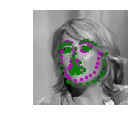

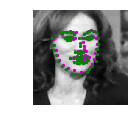

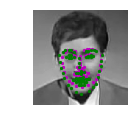

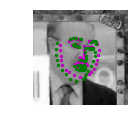

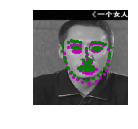

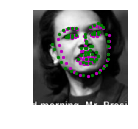

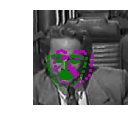

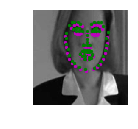

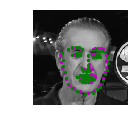

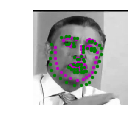

In [17]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [18]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: write your answer here (double click to edit this cell)

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: write your answer here

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: write your answer here

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[-0.2808643  -0.30200469  0.02103788 -0.28936425 -0.13732605]
 [-0.02722171 -0.21323262  0.08131704  0.08349901 -0.19629444]
 [ 0.12575123  0.0479275  -0.10142015 -0.11417201  0.13406663]
 [ 0.2057223  -0.06749362  0.16461891 -0.09426358  0.15081836]
 [ 0.0425693   0.18139209  0.19119301  0.21148948  0.170874  ]]
(5, 5)


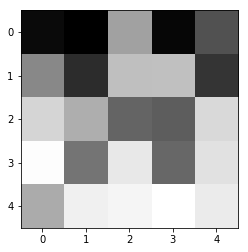

In [21]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1[0].weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: (does it detect vertical lines or does it blur out noise, etc.) write your answer here

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!